In [31]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langgraph.graph import StateGraph, START, END
from langchain_community.tools import TavilySearchResults
from langchain.tools import tavily_search
from typing import TypedDict
from dotenv import load_dotenv
import os
load_dotenv()

True

In [32]:
llm = ChatGoogleGenerativeAI( model="gemini-1.5-flash", temperature=0.1)

In [33]:
search = TavilySearchResults(
    api_key=os.getenv("TAVILY_API_KEY"),
    num_results=5
)

In [34]:
class MyState(TypedDict):
  topic:str
  Explaination:str
  summary:str
  questions:str
    

In [35]:
def Topic_explanation(state: MyState) -> MyState:
  topic = state["topic"]
  prompt = f"Explain in detail about {topic}"
  Explanation = llm.invoke(prompt).content
  state["Explaination"] = Explanation
  return state
   

In [36]:
def Summary(state:MyState) ->MyState:
  topic = state['topic']
  explanations = state['Explaination']
  prompt = f"Give me 100 words summary of this {explanations}"
  summary = llm.invoke(prompt).content
  state['summary'] = summary
  return state

In [37]:
def Prepare_question(state:MyState) -> MyState:
  topic = state['topic']
  explanations = state['Explaination']
  prompt = f"prepare a 5 MCQ question based on this topic :  {topic} and based on  this explanation : {explanations} "

  questions = llm.invoke(prompt).content
  state['questions'] = questions
  return state


In [38]:
graph = StateGraph(MyState)

graph.add_node("Topic_explanation",Topic_explanation)
graph.add_node("Summary" , Summary)
graph.add_node("Prepare_question",Prepare_question)

graph.add_edge(START,"Topic_explanation")
graph.add_edge("Topic_explanation","Summary")
graph.add_edge("Summary","Prepare_question")
graph.add_edge("Prepare_question",END)

app = graph.compile()


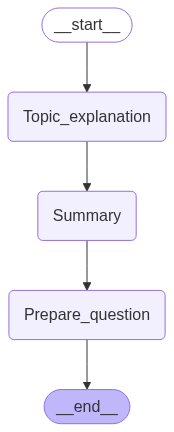

In [39]:
from IPython.display import display,Image
display(Image(app.get_graph().draw_mermaid_png()))

In [40]:
initial_state = {"topic" : "magnatic induction"}
final_answer = app.invoke(initial_state)
print(final_answer["topic"])

magnatic induction


In [41]:
print(final_answer["Explaination"])

Magnetic induction, also known as electromagnetic induction, is the process by which a changing magnetic field produces an electromotive force (EMF) in a conductor.  This EMF can drive a current if the conductor is part of a closed circuit.  It's a fundamental principle underlying many technologies, from electric generators to transformers and wireless charging.  Let's break down the key aspects:

**1. Faraday's Law of Induction:**

This law is the cornerstone of magnetic induction. It states that the magnitude of the induced EMF in a closed loop is directly proportional to the rate of change of magnetic flux through the loop.  Mathematically:

* **ε = -dΦ/dt**

Where:

* **ε** represents the induced electromotive force (EMF) in volts.
* **Φ** represents the magnetic flux in webers (Wb).  Magnetic flux is a measure of the total magnetic field that passes through a given area.  It's calculated as:  Φ = B⋅A⋅cosθ, where B is the magnetic field strength (in Tesla), A is the area of the loo

In [42]:
print(final_answer["summary"])

Magnetic induction, governed by Faraday's Law, describes how a changing magnetic field generates an electromotive force (EMF) in a conductor.  Lenz's Law dictates that the induced current opposes the change in flux.  The EMF's magnitude depends on the magnetic field strength, loop area, rate of flux change, and loop orientation.  Applications are widespread, including electric generators, transformers, wireless charging, and metal detectors.  Induction can be categorized as motional EMF (conductor moving through a field) or transformer EMF (changing field through a stationary coil).


In [43]:
print(final_answer["questions"])

Here are 5 multiple-choice questions based on the provided text about magnetic induction:

**1.  According to Faraday's Law, the induced electromotive force (EMF) in a closed loop is directly proportional to:**

a) The strength of the magnetic field alone.
b) The area of the loop alone.
c) The rate of change of magnetic flux through the loop.
d) The angle between the magnetic field and the loop's normal.


**2. Lenz's Law states that the direction of the induced current is such that it:**

a) Aids the change in magnetic flux.
b) Is independent of the change in magnetic flux.
c) Opposes the change in magnetic flux.
d) Is always clockwise.


**3. Which of the following factors DOES NOT directly affect the magnitude of the induced EMF?**

a) Strength of the magnetic field
b) Area of the loop
c) Resistance of the conductor
d) Rate of change of magnetic flux


**4.  A transformer utilizes which type of magnetic induction?**

a) Motional EMF
b) Eddy current induction
c) Transformer EMF
d)  N